# Day 6: Chronal Coordinates
The device on your wrist beeps several times, and once again you feel like you're falling.

"Situation critical," the device announces. "Destination indeterminate. Chronal interference detected. Please specify new target coordinates."

The device then produces a list of coordinates (your puzzle input). Are they places it thinks are safe or dangerous? It recommends you check manual page 729. The Elves did not give you a manual.

If they're dangerous, maybe you can minimize the danger by finding the coordinate that gives the largest distance from the other points.

Using only the Manhattan distance, determine the area around each coordinate by counting the number of integer X,Y locations that are closest to that coordinate (and aren't tied in distance to any other coordinate).

Your goal is to find the size of the largest area that isn't infinite. For example, consider the following list of coordinates:

```
1, 1
1, 6
8, 3
3, 4
5, 5
8, 9
```
If we name these coordinates A through F, we can draw them on a grid, putting 0,0 at the top left:
```
..........
.A........
..........
........C.
...D......
.....E....
.B........
..........
..........
........F.
```
This view is partial - the actual grid extends infinitely in all directions. Using the Manhattan distance, each location's closest coordinate can be determined, shown here in lowercase:
```
aaaaa.cccc
aAaaa.cccc
aaaddecccc
aadddeccCc
..dDdeeccc
bb.deEeecc
bBb.eeee..
bbb.eeefff
bbb.eeffff
bbb.ffffFf
```
Locations shown as . are equally far from two or more coordinates, and so they don't count as being closest to any.

In this example, the areas of coordinates A, B, C, and F are infinite - while not shown here, their areas extend forever outside the visible grid. However, the areas of coordinates D and E are finite: D is closest to 9 locations, and E is closest to 17 (both including the coordinate's location itself). Therefore, in this example, the size of the largest area is 17.

What is the size of the largest area that isn't infinite?

In [3]:
with open("day6.txt") as f:
    content = f.readlines()
content = [[int(q) for q in x.strip().split(', ')] for x in content]
content

[[353, 177],
 [233, 332],
 [178, 231],
 [351, 221],
 [309, 151],
 [105, 289],
 [91, 236],
 [321, 206],
 [156, 146],
 [94, 82],
 [81, 114],
 [182, 122],
 [81, 153],
 [319, 312],
 [334, 212],
 [275, 93],
 [224, 355],
 [347, 94],
 [209, 65],
 [118, 172],
 [113, 122],
 [182, 320],
 [191, 178],
 [99, 70],
 [260, 184],
 [266, 119],
 [177, 178],
 [313, 209],
 [61, 285],
 [155, 218],
 [354, 198],
 [274, 53],
 [225, 138],
 [228, 342],
 [187, 165],
 [226, 262],
 [143, 150],
 [124, 159],
 [325, 210],
 [163, 176],
 [326, 91],
 [170, 193],
 [84, 265],
 [199, 248],
 [107, 356],
 [45, 340],
 [277, 173],
 [286, 44],
 [242, 150],
 [120, 230]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's find the extent of our data first.

In [5]:
a, b = [300, 300]
c, d = [0, 0]
for x in content:
    a = min(a, x[0])
    b = min(b, x[1])
    c = max(c, x[0])
    d = max(d, x[1])

In [6]:
print(a, b, c, d)

45 44 354 356


And now we can set up our matrix

In [7]:
field = np.zeros([c-a, d-b])
field.shape

(309, 312)

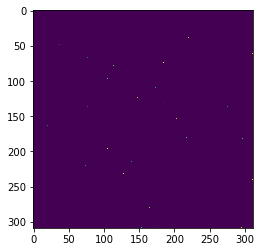

In [8]:
for i, x in enumerate(content):
    field[x[0]-a-1, x[1]-b-1] = i+1

plt.imshow(field)

Essentially, we are looking at a Voronoi diagram.

In [22]:
from scipy.spatial import Voronoi, voronoi_plot_2d, tsearch

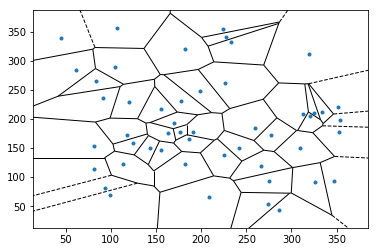

In [25]:
vor = Voronoi(content)
_ = voronoi_plot_2d(vor, show_vertices=False)

In [47]:
good_regions = []
indices = []
for i, x in enumerate(vor.regions):
    if not (-1 in x):
        indices.append(i)
        good_regions.append(vor.point_region[i-1])

TypeError: 'Voronoi' object is not iterable